In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os
if not os.path.exists('./img'):
    os.mkdir('./img')

In [2]:
with np.load('dimredux-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    validation_x = fh['validation_x']
    validation_y = fh['validation_y']
    
#Training data
"""print(data_x.shape)"""
#validation data
"""print(validation_x.shape)"""
#validation data, metastable states
"""print(validation_y.shape)"""

(100000, 3)
(1000, 3)
(1000,)


<IPython.core.display.Javascript object>


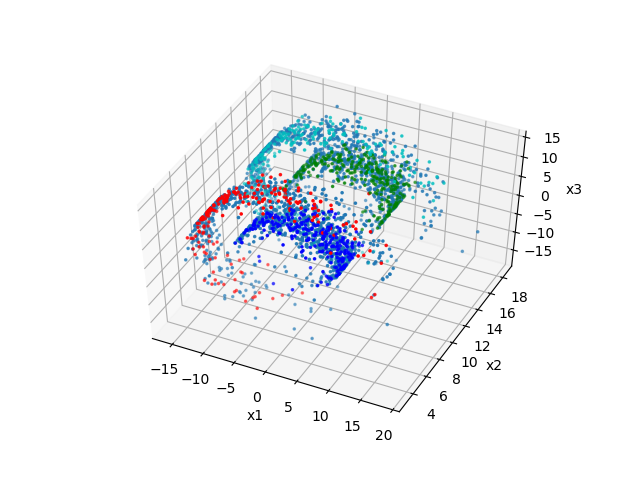

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs=data_x[:,0]
ys=data_x[:,1]
zs=data_x[:,2]
ax.scatter(xs[::50], ys[::50], zs[::50],marker='.',s=10)
xs=validation_x[:,0]
ys=validation_x[:,1]
zs=validation_x[:,2]
c=np.empty(validation_y.shape,dtype='<U1')
for index,cs in enumerate(zip(validation_y==0,
                              validation_y==1,
                              validation_y==2,
                              validation_y==3)):
    if cs[0]:
        c[index]='b'    
    if cs[1]:
        c[index]='g'
    if cs[2]:
        c[index]='c'
    if cs[3]:
        c[index]='r'
ax.scatter(xs,ys,zs,marker='.',s=10,c=c)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

<IPython.core.display.Javascript object>


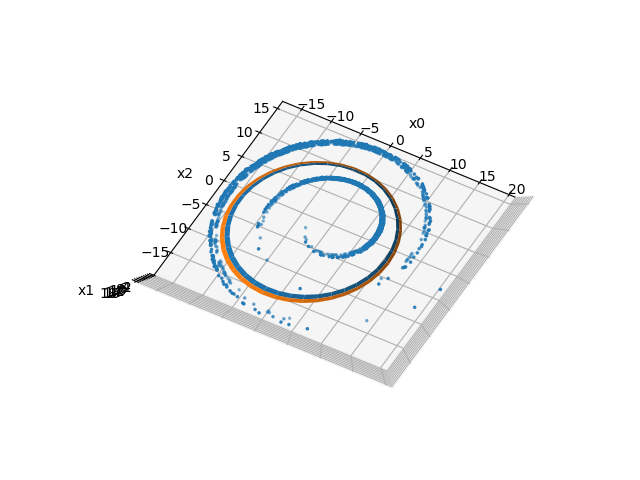

In [179]:
data_y=np.empty(data_x[:,0].shape)
for index,x in enumerate(data_x):
    if x[1]<=12:
        if np.sqrt(abs(-2+x[0])**2+abs(-2+x[2])**2)<=11:
            data_y[index]=0
        else:
            data_y[index]=3
    else:
        if np.sqrt(abs(-2+x[0])**2+abs(-2+x[2])**2)<=11:
            data_y[index]=1
        else:
            data_y[index]=2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs=data_x[:,0]
ys=data_x[:,2]
zs=data_x[:,1]
ax.scatter(xs[::50], ys[::50], zs[::50],marker='.',s=10)

n=20
r=12
x0=-2
z0=-2
kreis=np.linspace(0,2*np.pi,2*n)
xs=r*np.cos(kreis)+x0
ys=np.empty([2,n*2])
ys[0]=2
ys[1]=11
zs=r*np.sin(kreis)+z0
ax.plot_surface(xs,zs,ys)

n=20
r=12
x0=-2
z0=-2
kreis=np.linspace(0,2*np.pi,2*n)
xs=r*np.cos(kreis)+x0
ys=np.empty([2,n*2])
ys[0]=11
ys[1]=18
zs=r*np.sin(kreis)+z0
ax.plot_surface(xs,zs,ys)

ax.set_xlabel('x0')
ax.set_ylabel('x2')
ax.set_zlabel('x1')

plt.show()

<IPython.core.display.Javascript object>


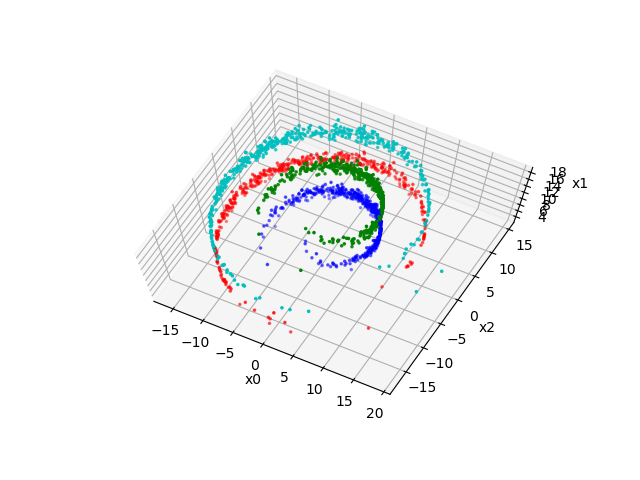

In [182]:
data_y=np.empty(data_x[:,0].shape)
for index,x in enumerate(data_x):
    if x[1]<=12:
        if np.sqrt(abs(-2-x[0])**2+abs(-2-x[2])**2)<=12:
            data_y[index]=0
        else:
            data_y[index]=3
    else:
        if np.sqrt(abs(-2-x[0])**2+abs(-2-x[2])**2)<=12:
            data_y[index]=1
        else:
            data_y[index]=2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs=data_x[:,0]
ys=data_x[:,2]
zs=data_x[:,1]
c=np.empty(data_y.shape,dtype='<U1')
for index,cs in enumerate(zip(data_y==0,
                              data_y==1,
                              data_y==2,
                              data_y==3)):
    if cs[0]:
        c[index]='b'    
    if cs[1]:
        c[index]='g'
    if cs[2]:
        c[index]='c'
    if cs[3]:
        c[index]='r'
ax.scatter(xs[::50], ys[::50], zs[::50],marker='.',s=10,c=c[::50])


ax.set_xlabel('x0')
ax.set_ylabel('x2')
ax.set_zlabel('x1')

plt.show()